In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [24]:
img = image.load_img(r"C:\Users\gulce\OneDrive\Masaüstü\Facial Mood Recognition\dataset\Training\happy\20211231_225436.jpg")

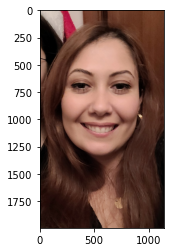

In [25]:
plt.imshow(img)

In [26]:
cv2.imread(r"C:\Users\gulce\OneDrive\Masaüstü\Facial Mood Recognition\dataset\Training\happy\20211231_225436.jpg")

In [27]:
train= ImageDataGenerator (rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [28]:
train_dataset= train.flow_from_directory(r"C:\Users\gulce\OneDrive\Masaüstü\Facial Mood Recognition\dataset\Training",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r"C:\Users\gulce\OneDrive\Masaüstü\Facial Mood Recognition\dataset\Validation",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')

Found 46 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


In [29]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [30]:
model= tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   
                                  ])

In [31]:
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics= ['accuracy'])

In [32]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=50,
                   validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 1s 320ms/step - loss: 8.7508 - accuracy: 0.2222 - val_loss: 1.2976 - val_accuracy: 0.5385
Epoch 2/50
3/3 [==============================] - 1s 275ms/step - loss: 1.7299 - accuracy: 0.4444 - val_loss: 0.6714 - val_accuracy: 0.5385
Epoch 3/50
3/3 [==============================] - 1s 247ms/step - loss: 0.9272 - accuracy: 0.4286 - val_loss: 0.6895 - val_accuracy: 0.5385
Epoch 4/50
3/3 [==============================] - 1s 276ms/step - loss: 0.7272 - accuracy: 0.4444 - val_loss: 0.6923 - val_accuracy: 0.4615
Epoch 5/50
3/3 [==============================] - 1s 266ms/step - loss: 0.6059 - accuracy: 0.7778 - val_loss: 0.8464 - val_accuracy: 0.4615
Epoch 6/50
3/3 [==============================] - 1s 267ms/step - loss: 0.9434 - accuracy: 0.4444 - val_loss: 0.6715 - val_accuracy: 0.6154
Epoch 7/50
3/3 [==============================] - 1s 257ms/step - loss: 0.6009 - accuracy: 0.5556 - val_loss: 0.8097 - val_accuracy: 0.5385
Epoch 8/50
3/3 [====

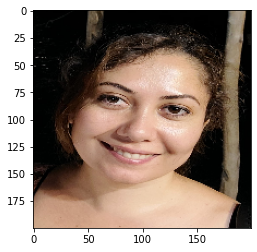

1/1 [==============================] - 0s 58ms/step
I look happy in this picture


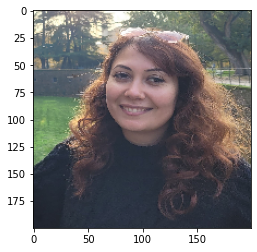

1/1 [==============================] - 0s 26ms/step
I look happy in this picture


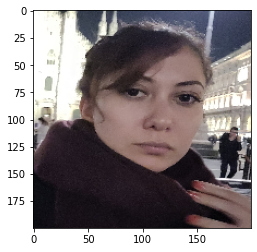

1/1 [==============================] - 0s 22ms/step
I don't look happy in this picture


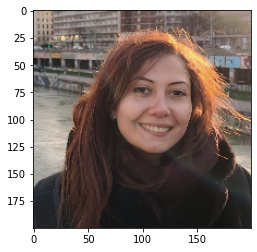

1/1 [==============================] - 0s 25ms/step
I look happy in this picture


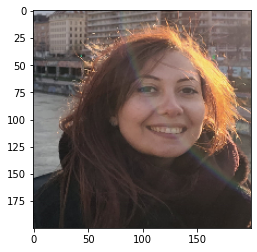

1/1 [==============================] - 0s 23ms/step
I look happy in this picture


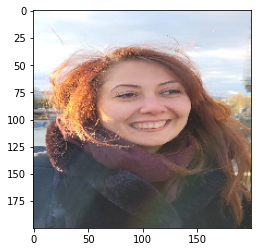

1/1 [==============================] - 0s 28ms/step
I look happy in this picture


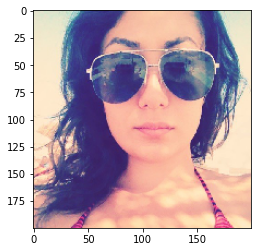

1/1 [==============================] - 0s 25ms/step
I don't look happy in this picture


In [33]:
dir_path=r"C:\Users\gulce\OneDrive\Masaüstü\Facial Mood Recognition\dataset\Testing"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val=model.predict(images)
    if val==0:
        print("I look happy in this picture")
    else:
        print("I don't look happy in this picture")
